Análisis de las distancias promedio entre neuronas vecinas

Comenzamos leyendo los datos del archivo csv que se utilizará para entrenar la red. Estos se encuentran en el archivo "europe.csv".
Además, contamos con un archivo de configuración "kohonen_2.json" que contiene los parámetros de la red de Kohonen que se utilizará para el análisis.

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import json
from core.kohonen import Kohonen

config_file = "../configs/kohonen_2.json"

with open(config_file) as f:
    config = json.load(f)

europe_data = pd.read_csv(config['data']['source'])
df = europe_data[config['data']['features']]
scaler = StandardScaler()
data = scaler.fit_transform(df.values) # we need to scale the data
#print(data.shape) # we've got 28 elements with 7 features
#print(data)
weights = None
current_grid_size = 5
current_iterations = 1000

In [2]:


som = Kohonen(
    data=data,
    grid_size=current_grid_size,
    learning_rate=config['kohonen']['learning_rate'],
    eta_function=config['kohonen']['eta_function'],
    radius=config['kohonen']['initial_radius'],
    radius_function=config['kohonen']['radius_function'],
    similarity_function=config['kohonen']['similarity_function'],
    seed=config['kohonen']['seed'],
    weights=weights
)

som.fit(current_iterations)

Ahora vamos a graficar la distancia promedio entre neuronas vecinas en un heatmap utilizando los pesos de la red de Kohonen.

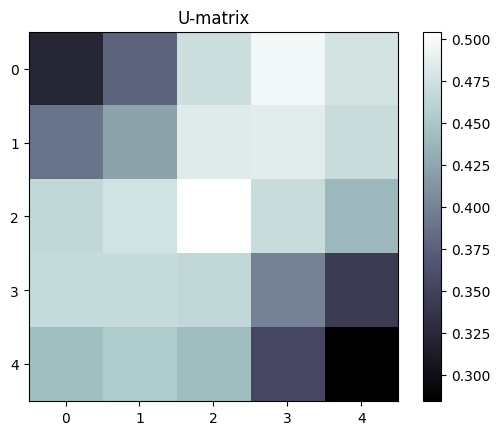

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from core.kohonen import Kohonen

def plot_U_matrix(som: Kohonen, cmap='bone'):
    plt.figure()
    plt.title('U-matrix')
    plt.imshow(som.calculate_umatrix(), cmap=cmap) # cmap is the color map
    plt.colorbar()
    plt.show()


plot_U_matrix(som)


La Matriz U nos dice cuánto se parecen las neuronas entre sí. Si la distancia promedio entre neuronas vecinas es baja, entonces las neuronas son muy parecidas entre sí. Si la distancia promedio entre neuronas vecinas es alta, entonces las neuronas son muy diferentes entre sí.

La distancia para cada feature ya está graficada en el archivo ej1_kohonen.ipynb.